# Coin toss quantum circuit
In this exercise we create a quantum circuit that simulates the probabilistic nature of a single qubit in superposition. The one qubit circuit initializes the qubit in the ground state $|0\rangle$ and then uses a Hadamard gate to put the qubit in superposition $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$  
Measuring the qubit causes it to collapse into one of the states $|0\rangle$ or $|1\rangle$ with a 50% probability, i.e. a coin toss.   
In this exercise we introduce the Hadamard gate, which puts a qubit in superposition.
```
        ┌───┐  
q_0: |0>┤ H ├  
        └───┘  
```

We also introduce the X gate that flips the qubit from $|0\rangle$ to $|1\rangle$ and vice versa.
```
        ┌───┐
q_0: |0>┤ X ├
        └───┘
```

Import the required libraries.

In [1]:
from qiskit import QuantumCircuit, execute, Aer

# Import Blochsphere visualization
from qiskit.visualization import plot_bloch_multivector, plot_histogram

As we will be using the Bloch sphere visualization (`plot_bloch_multivector`) a bit, here's a quick function that calculates the state vector ($|\psi\rangle$) for the circuit to let you display the Bloch vector for any given state.


In [2]:
def get_psi(circuit): 
    global psi
    backend = Aer.get_backend('statevector_simulator') 
    psi = execute(circuit, backend).result().get_statevector(circuit)

Create an empty quantum circuit. We start out with the qubit in the $|0\rangle$ state.

        
q_0: |0>
        
 c_0: 0 
        


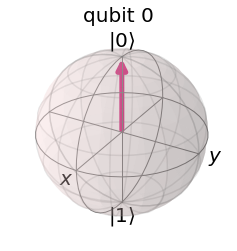

In [3]:
qc = QuantumCircuit(1,1)

# Print out the circuit
print(qc)

# Display the Bloch sphere
get_psi(qc)
plot_bloch_multivector(psi)

Add a Hadamard (super position) gate to the quantum circuit. This puts the qubit in a superposition: $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$

        ┌───┐
q_0: |0>┤ H ├
        └───┘
 c_0: 0 ═════
             


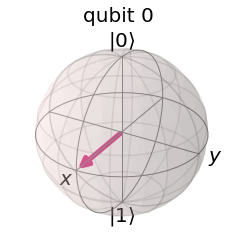

In [4]:
qc.h(0)

# Print out the circuit
print(qc)

# Display the Bloch sphere
get_psi(qc)
plot_bloch_multivector(psi)


Finally, add a measurement gate to complete the circuit.

In [5]:
# Add measure gate
qc.measure(0,0)
print(qc)

        ┌───┐┌─┐
q_0: |0>┤ H ├┤M├
        └───┘└╥┘
 c_0: 0 ══════╩═
                


Set the backend to a local simulator.

In [6]:
backend = Aer.get_backend('qasm_simulator')

Create a quantum job that runs just one shot to simulate a coin toss. Then run the job and display the result; either 0 for up (base) or 1 for down (excited). Display the result as a histogram.

{'1': 1}


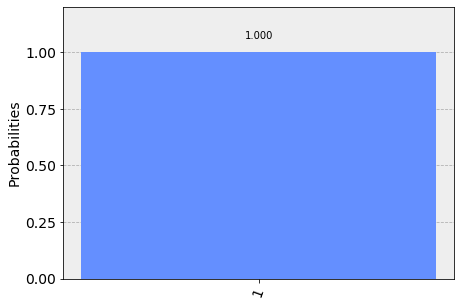

In [7]:
job = execute(qc, backend, shots=1)
counts  = job.result().get_counts()
print(counts)
plot_histogram(counts)

Now, lets run a thousand coin tosses in a row and see what we get.

{'1': 523, '0': 477}


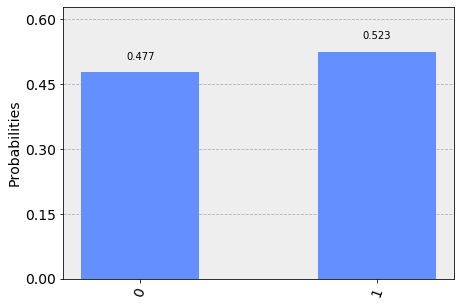

In [8]:
job = execute(qc, backend, shots=1000)
counts  = job.result().get_counts()
print(counts)
plot_histogram(counts)

In the histogram we see that we get 0 and 1 with ~50% probability. Which is what we expect from tossing some coins.

We can also do our coin flip with the qubit starting in the $|1\rangle$ state by first flipping the qubit by using the X gate. The Hadamard gate still flips the qubit to the equator, but now on the -X side.

        ┌───┐┌───┐
q_0: |0>┤ X ├┤ H ├
        └───┘└───┘
 c_0: 0 ══════════
                  


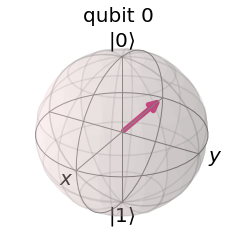

In [9]:
qc2 = QuantumCircuit(1,1)
qc2.x(0)
qc2.h(0)
print(qc2)
# Display the Bloch sphere
get_psi(qc2)
plot_bloch_multivector(psi)

Add the measure gate and run the circuit 1,000 times.

{'1': 527, '0': 473}


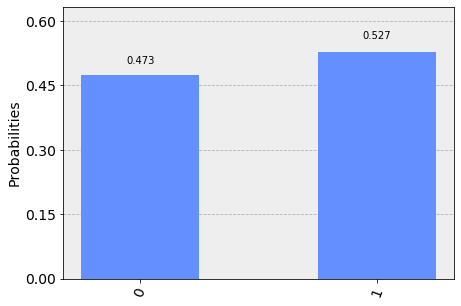

In [10]:
qc2.measure(0,0)

job2 = execute(qc2, backend, shots=1000)
counts2  = job2.result().get_counts()
print(counts2)
plot_histogram(counts2)

As you can see, there is no real difference in the outcome. 